## Comparing Means

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Comparing means for t-test

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's single value t-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score:
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by:
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where:
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments:

In [2]:
x = [48, 50, 54, 60]

We can obtain the *t*-statistic for this sample as follows:

In [3]:
xbar = np.mean(x)
xbar

np.float64(53.0)

In [4]:
sx = st.sem(x)
sx

np.float64(2.6457513110645907)

In [5]:
t = (xbar - 50) / sx
t

np.float64(1.1338934190276817)

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [6]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [7]:
p_from_t(t, len(x))

np.float64(0.33925405085645427)

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method:

In [8]:
st.ttest_1samp(x, 50)

TtestResult(statistic=np.float64(1.1338934190276817), pvalue=np.float64(0.33925405085645427), df=np.int64(3))

## Welch's Independent t-Test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent t-test**

In [9]:
penguins = sns.load_dataset("penguins").dropna() # drop missing values
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [10]:
penguins.shape

(333, 7)

In [11]:
np.unique(penguins["species"], return_counts=True)


(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [12]:
adelie = penguins[penguins["species"] == "Adelie"]

In [13]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [14]:
np.unique(adelie["island"], return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [15]:
np.unique(adelie["sex"], return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

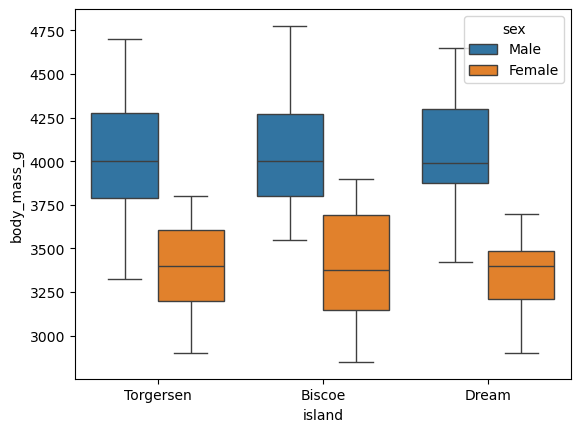

In [16]:
_ = sns.boxplot(x="island", y="body_mass_g", hue="sex", data=adelie)

Mass doesn't appear to vary based on different islands, so, we can be group the data together by islands. Whereas mass difference appears to be varing based on sex, let us take a closer look at it. 

In [17]:
f = adelie[adelie["sex"] == "Female"].body_mass_g.to_numpy() / 1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [18]:
m = adelie[adelie["sex"] == "Male"].body_mass_g.to_numpy() / 1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [19]:
fbar = f.mean()
fbar

np.float64(3.368835616438356)

In [20]:
mbar = m.mean()
mbar

np.float64(4.043493150684932)

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where:
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes


**N.B.**: Student's independent *t*-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [21]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)
sf, sm

(np.float64(0.07256563926940643), np.float64(0.12027825342465753))

In [23]:
nf = f.size
nm = len(m)
nf, nm

(73, 73)

In [24]:
t = (fbar - mbar) / np.sqrt(sf/nf + sm/nm)
t

np.float64(-13.126285923485879)

Degrees of freedom for calculating the *p*-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation), which we won't detail but is defined as:

In [25]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [26]:
df = ws_eqn(sf, sm, nf, nm)
df

np.float64(135.69357893530386)

In [27]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

np.float64(6.402319748031473e-26)

In [28]:
-np.log10(p)

np.float64(25.193662639886046)

In [30]:
st.ttest_ind(f, m, equal_var=False) # equal_var=False means we don't assume the variances are equal and hence use Welch's t-test

TtestResult(statistic=np.float64(-13.126285923485879), pvalue=np.float64(6.402319748031473e-26), df=np.float64(135.69357893530386))

## Student's Paired t-Test

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*.

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test.

In [33]:
# Here is an example

exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment (i.e, after one, 15, and 30 minutes). Ten people were assigned to each of three activity groups:

In [34]:
np.unique(exercise["kind"], return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Within each of those activity groups, half of the participants are on a low-fat diet while the other half are on a no-fat diet:

In [35]:
np.unique(exercise["diet"], return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

For simplicity, let's only consider one of the six experimental groups, say the walking, no-fat dieters:

In [36]:
walk_no = exercise[(exercise["diet"] == "no fat") & (exercise["kind"] == "walking")]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

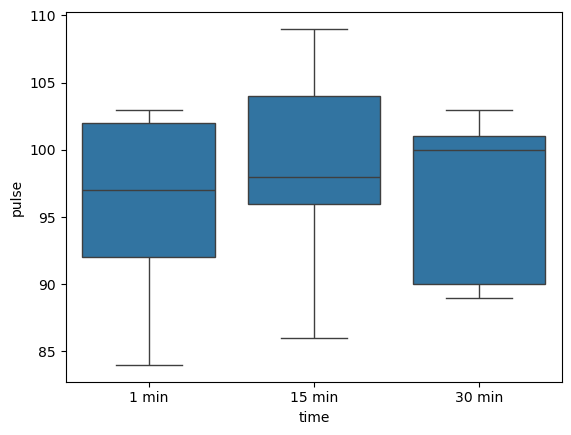

In [37]:
_ = sns.boxplot(x="time", y="pulse", data=walk_no)

In [38]:
min1 = walk_no[walk_no["time"] == "1 min"]["pulse"].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [39]:
min1.mean()

np.float64(95.6)

In [40]:
min15 = walk_no[walk_no["time"] == "15 min"]["pulse"].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [41]:
min15.mean()

np.float64(98.6)

In [42]:
min30 = walk_no[walk_no["time"] == "30 min"]["pulse"].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [43]:
min30.mean()

np.float64(96.6)

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

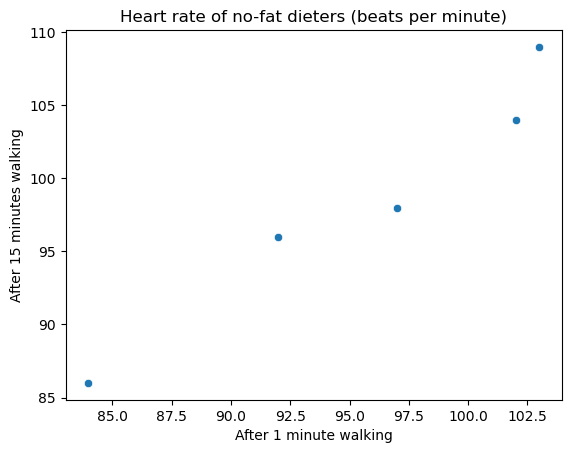

In [44]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test:
$$ t = \frac{\bar{d} - \mu_0}{s_{\bar{d}}} $$
Where:
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_{\bar{d}}$ is the standard error of the differences

In [45]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [47]:
dmean = d.mean()
dmean

np.float64(3.0)

In [49]:
# standard error
dsem = st.sem(d)
dsem

np.float64(0.8944271909999159)

In [53]:
#  calculate t
t = (dmean - 0) / dsem
t

np.float64(3.3541019662496847)

In [54]:
p_from_t(t, len(d))

np.float64(0.02846020325433834)

In [55]:
st.ttest_rel(min15, min1)

TtestResult(statistic=np.float64(3.3541019662496847), pvalue=np.float64(0.02846020325433834), df=np.int64(4))

In contrast, if we were to put the same values into an independent *t*-test...

In [57]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=np.float64(0.5729114862838532), pvalue=np.float64(0.5826164805627767), df=np.float64(7.91150470414055))

#### Machine Learning Example

* Single-sample: Does my stochastic model tend to be more accurate than an established benchmark?
* Independent samples: Does my model have unwanted bias in it, e.g., do white men score higher than other demographic groups with HR model?
* Paired samples: Is new TensorFlow.js model significantly faster? (paired by browser / device)

**Exercises**
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process?
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?

**Spoiler alert**: Solutions below

Solution 1. Perform student's independent t-test

In [62]:
x = [48, 50, 54, 60, 49, 55, 59, 62]
xmean = np.mean(x)
sx = st.sem(x)
t = (xmean - 50) / sx
pval = p_from_t(t, len(x))
t, pval


(np.float64(2.448085108904054), np.float64(0.0442312968303811))

In [61]:
st.ttest_1samp(x, 50)

TtestResult(statistic=np.float64(2.448085108904054), pvalue=np.float64(0.0442312968303811), df=np.int64(7))

conslusion of the above given x values signify that the p-value is less than 0.05 or 5 % and ttest(7) = 2.45 hence this the new GMO-yeast is significantly different

Solution 2: As we are comparing flipper length between sex of penguiens species Adelie

In [63]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [78]:
pa_f =adelie[(adelie["sex"] == "Female") & (adelie["island"] == "Dream")].flipper_length_mm.to_numpy() / 1000
pa_f

array([0.178, 0.188, 0.195, 0.18 , 0.181, 0.182, 0.186, 0.185, 0.19 ,
       0.191, 0.189, 0.19 , 0.202, 0.185, 0.187, 0.19 , 0.178, 0.193,
       0.187, 0.191, 0.185, 0.193, 0.188, 0.192, 0.184, 0.195, 0.187])

In [79]:
pa_m = adelie[(adelie["sex"] == "Male") & (adelie["island"] == "Dream")].flipper_length_mm.to_numpy() / 1000
pa_m

array([0.178, 0.184, 0.196, 0.19 , 0.184, 0.195, 0.196, 0.19 , 0.182,
       0.191, 0.194, 0.19 , 0.189, 0.205, 0.186, 0.208, 0.196, 0.192,
       0.199, 0.19 , 0.2  , 0.193, 0.187, 0.19 , 0.185, 0.19 , 0.193,
       0.201])

In [80]:
fbar = pa_f.mean()
mbar = pa_m.mean()
fbar, mbar

(np.float64(0.18785185185185188), np.float64(0.19192857142857142))

In [81]:
sf = np.var(pa_f, ddof=1)
sm = np.var(pa_m, ddof=1)
sf, sm

(np.float64(3.0361823361823413e-05), np.float64(4.629100529100531e-05))

In [82]:
nf = len(pa_f)
nm = len(pa_m)
nf, nm

(27, 28)

In [83]:
t = (fbar - mbar) / (sf / nf + sm / nm)**0.5
t

np.float64(-2.4460386199991677)

In [84]:
df = ws_eqn(sf, sm, nf, nm)
df

np.float64(51.485528184492175)

In [85]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

np.float64(0.017898599613025014)

In [86]:
st.ttest_ind(pa_f, pa_m, equal_var=False) # equal_var=False means we don't assume the variances are equal and hence use Welch's t-test

TtestResult(statistic=np.float64(-2.4460386199991677), pvalue=np.float64(0.017898599613025014), df=np.float64(51.485528184492175))

p-value is 0.018 is less  than 0.05 and hence the difference is significane

Solution 3:


In [97]:
low_fat = exercise[(exercise["diet"] == "low fat") & (exercise["kind"] == "rest")]
low_fat.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [98]:
lf_1min = low_fat[low_fat["time"] == "1 min"]["pulse"].to_numpy()
lf_1min

array([85, 90, 97, 80, 91])

In [99]:
lf_15min = low_fat[low_fat["time"] == "15 min"]["pulse"].to_numpy()
lf_15min

array([85, 92, 97, 82, 92])

In [100]:
mean_1min = lf_1min.mean()
mean_15min = lf_15min.mean()
mean_1min, mean_15min

(np.float64(88.6), np.float64(89.6))

In [101]:
d = lf_15min - lf_1min
d

array([0, 2, 0, 2, 1])

In [102]:
dmean = d.mean()
dmean

np.float64(1.0)

In [103]:
dsem = st.sem(d)
dsem

np.float64(0.4472135954999579)

In [104]:
t = (dmean - 0) / dsem
t

np.float64(2.23606797749979)

In [105]:
p_from_t(t, len(d))

np.float64(0.08900934250008564)

In [106]:
st.ttest_rel(lf_15min, lf_1min)

TtestResult(statistic=np.float64(2.23606797749979), pvalue=np.float64(0.08900934250008564), df=np.int64(4))

p value is > 0.05 and hence there is no significant difference 

Finally,

1. The GMO yeast yields a mean of 54.6L, which is significantly more stout than the baseline process, *t*(7) = 2.45, $p < .05$.
2. On Dream island, the flippers of male Adélie penguins (191.9 mm) are significantly longer than those of females (187.9 mm), *t* = 2.4, *p* < .05.
3. The heart rate of low-fat dieters did not change significantly after one minute of rest (88.6 bpm) relative to after 15 minutes of rest (89.6 bpm), *t*=2.2, *p* = .09.